### Understanding torch.nn.Module in PyTorch
In PyTorch, nn.Module is the base class for all neural network models.
It is a building block for creating, training, and managing model

In [2]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()  # Initialize the base class
        
        # Define the layers
        self.hidden_layer = nn.Linear(input_size, hidden_size)  # Input -> Hidden
        self.output_layer = nn.Linear(hidden_size, output_size)  # Hidden -> Output
    
    def forward(self, x):
        # Define the forward pass
        x = torch.relu(self.hidden_layer(x))  # Apply activation after hidden layer
        x = self.output_layer(x)  # Output layer
        return x


In [3]:
# Define model parameters
input_size = 2
hidden_size = 4
output_size = 1

# Create an instance of the model
model = SimpleNN(input_size, hidden_size, output_size)

# Create some sample input data (batch_size=3, input_size=2)
input_data = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Perform a forward pass
output = model(input_data)
print("Model Output:")
print(output)


Model Output:
tensor([[-0.2775],
        [-0.3363],
        [-0.3951]], grad_fn=<AddmmBackward0>)


In [5]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0770, -0.5465],
        [ 0.6207, -0.1897],
        [-0.6946,  0.7025],
        [-0.2999,  0.6792]], requires_grad=True)
Parameter containing:
tensor([-0.2192,  0.1801,  0.5866,  0.3376], requires_grad=True)
Parameter containing:
tensor([[ 0.1723, -0.0148, -0.0012, -0.0607]], requires_grad=True)
Parameter containing:
tensor([-0.1848], requires_grad=True)


In [6]:
model.eval()
with torch.no_grad():
    output = model(input_data)


In [7]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model.load_state_dict(torch.load("model.pth"))

### Example 2

In [8]:
class ExtendedNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ExtendedNN, self).__init__()
        
        # Define the layers
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


In [9]:
# Define a model
model = ExtendedNN(input_size=2, hidden_size1=4, hidden_size2=3, output_size=1)

# Define some input data
input_data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Forward pass
output = model(input_data)
print("Output:", output)

# Check trainable parameters
print("Model Parameters:")
for name, param in model.named_parameters():
    print(name, param.shape)


Output: tensor([[-0.0510],
        [-0.0510]], grad_fn=<AddmmBackward0>)
Model Parameters:
hidden1.weight torch.Size([4, 2])
hidden1.bias torch.Size([4])
hidden2.weight torch.Size([3, 4])
hidden2.bias torch.Size([3])
output.weight torch.Size([1, 3])
output.bias torch.Size([1])


### Example 3

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Create synthetic data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Shape: (N, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)    # Shape: (N, 1)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)


Training data shape: torch.Size([400, 2])
Training labels shape: torch.Size([400, 1])


In [13]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleClassifier, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Input -> Hidden
        self.output = nn.Linear(hidden_size, 1)          # Hidden -> Output
        self.sigmoid = nn.Sigmoid()                      # Sigmoid for binary classification

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # ReLU activation for hidden layer
        x = self.sigmoid(self.output(x))  # Sigmoid activation for output layer
        return x


In [14]:
# Define model
input_size = 2       # Number of input features (x, y)
hidden_size = 10     # Number of neurons in hidden layer
model = SimpleClassifier(input_size, hidden_size)

# Define loss function (Binary Cross-Entropy for binary classification)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

# Define optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

print(model)  # Print model structure

SimpleClassifier(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [16]:
# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    #if (epoch + 1) % 2 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 0.6314
Epoch [2/100], Loss: 0.6244
Epoch [3/100], Loss: 0.6176
Epoch [4/100], Loss: 0.6108
Epoch [5/100], Loss: 0.6040
Epoch [6/100], Loss: 0.5973
Epoch [7/100], Loss: 0.5906
Epoch [8/100], Loss: 0.5840
Epoch [9/100], Loss: 0.5773
Epoch [10/100], Loss: 0.5706
Epoch [11/100], Loss: 0.5640
Epoch [12/100], Loss: 0.5573
Epoch [13/100], Loss: 0.5506
Epoch [14/100], Loss: 0.5440
Epoch [15/100], Loss: 0.5373
Epoch [16/100], Loss: 0.5307
Epoch [17/100], Loss: 0.5241
Epoch [18/100], Loss: 0.5175
Epoch [19/100], Loss: 0.5109
Epoch [20/100], Loss: 0.5045
Epoch [21/100], Loss: 0.4981
Epoch [22/100], Loss: 0.4917
Epoch [23/100], Loss: 0.4854
Epoch [24/100], Loss: 0.4792
Epoch [25/100], Loss: 0.4730
Epoch [26/100], Loss: 0.4670
Epoch [27/100], Loss: 0.4611
Epoch [28/100], Loss: 0.4553
Epoch [29/100], Loss: 0.4496
Epoch [30/100], Loss: 0.4440
Epoch [31/100], Loss: 0.4386
Epoch [32/100], Loss: 0.4333
Epoch [33/100], Loss: 0.4281
Epoch [34/100], Loss: 0.4231
Epoch [35/100], Loss: 0

In [17]:
# Evaluate on test data
with torch.no_grad():
    test_predictions = model(X_test)
    test_predictions = (test_predictions > 0.5).float()  # Convert probabilities to binary labels
    
    accuracy = (test_predictions == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


Test Accuracy: 86.00%


E:\LLM-Implementations\venv\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


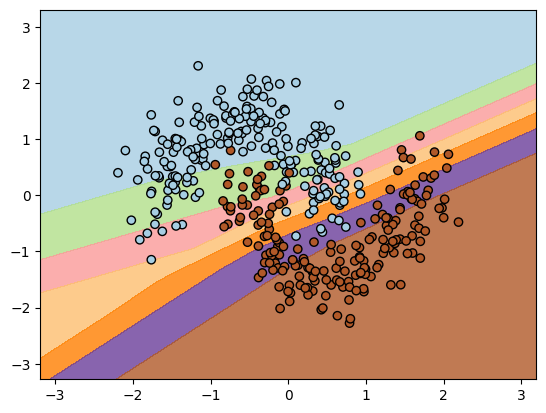

In [18]:
# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))
    grid = torch.cat([xx.ravel().unsqueeze(1), yy.ravel().unsqueeze(1)], dim=1)
    with torch.no_grad():
        zz = model(grid)
        zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.show()

# Plot for training data
plot_decision_boundary(model, X_train.numpy(), y_train.numpy())


In [19]:
import torch
import torch.nn as nn

# Define a linear layer with 3 input features and 2 output features
linear_layer = nn.Linear(in_features=3, out_features=2)

# Input tensor of shape (batch_size, in_features)
x = torch.tensor([[1.0, 2.0, 3.0]])  # Shape: (1, 3)

# Forward pass through the layer
output = linear_layer(x)
print(output)  # Shape: (1, 2)



tensor([[0.3449, 1.5936]], grad_fn=<AddmmBackward0>)


In [20]:
relu = nn.ReLU()

x = torch.tensor([[-1.0, 2.0, -3.0, 4.0]])
output = relu(x)
print(output)  

tensor([[0., 2., 0., 4.]])


In [21]:
sigmoid = nn.Sigmoid()

x = torch.tensor([[0.5, 1.0, -1.0]])
output = sigmoid(x)
print(output)

tensor([[0.6225, 0.7311, 0.2689]])


In [22]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0]])
output = softmax(x)
print(output)  # Probabilities sum to 1


tensor([[0.0900, 0.2447, 0.6652]])


In [23]:
dropout = nn.Dropout(p=0.5)

x = torch.tensor([[1.0, 2.0, 3.0]])
output = dropout(x)
print(output)

tensor([[0., 4., 6.]])


In [24]:
embedding = nn.Embedding(num_embeddings=10, embedding_dim=3)

x = torch.tensor([1, 2, 3])  # Token IDs
output = embedding(x)
print(output)  # Shape: (3, 3)

tensor([[ 0.9124,  0.5946,  1.0379],
        [-0.4832, -0.0324, -0.2348],
        [-0.1959, -1.4114,  2.2250]], grad_fn=<EmbeddingBackward0>)


In [25]:
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

x = torch.randn(5, 10)  # Batch of 5 samples, 10 features each
output = model(x)
print(output.shape)  # Shape: (5, 1)

torch.Size([5, 1])
